### Riccardo Cusinato - 3627460
### Giacomo Barzon - 3626438
### Damiano Sgarbossa - 3623971  

# Exercise 1.1 - Heat diffusion in one dimension

#### 1D heat diffusion problem: $ -D \dfrac{\partial^2 T(x)}{\partial x^2} = \epsilon $
#### with boundary conditions: $ T(x= \pm L) = T_0 $
#### using $D=1$, $\epsilon = 1$, $T_0 = 1$, $L = 1$ and $N = 100$ grid points.

#### ** Analytical solution: $ T(x) = -\dfrac{\epsilon}{2 D}x^2 + \dfrac{\epsilon L_0}{2 D}x + T_0 $

### 1) Write down the numeric form of the 1D heat diffusion problem

$$
\begin{cases} 
    -D\dfrac{(T_{i+1} - 2 T_{i} + T_{i-1})}{h^2} = \epsilon \ \ \ \ for \ 1<i<N\\\\T_1 = T_N = T_0\\\\
\end{cases}
$$
where h = L / N

### 2) Write this in matrix notation

$$
\begin{bmatrix}
1 & 0 & \cdots & & \\
1 & -2 & 1 & 0 & \cdots & \\
0 & 1 & -2 & 1 & 0 & \cdots \\
 &  & & \ddots &  &  \\
 & \cdots & 0 & 1 & -2 & 1 \\
 & & & \cdots & 0 & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
T_1 \\
\vdots \\
T_{i-1} \\
T_i \\
T_{i+1} \\
\vdots \\
T_N
\end{bmatrix}
=
\begin{bmatrix}
T_0 \\
- \dfrac{h^2 \epsilon}{D} \\
\vdots \\
- \dfrac{h^2 \epsilon}{D} \\
T_0
\end{bmatrix}
$$

### 3) Come up with a way to store the matrix elements of this tridiagonal matrix into only three 1D arrays of N elements

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 100
L0 = 1.
T0 = 1.
Dc = 1.
eps = 1.

In [2]:
# Generate diagonal, first upper and lower diagonal, offset vector
# for different input dimensions N
def createArray(N, L0=1.):
    h = L0 / (N-1)
    
    # main diagonal of matrix A
    D = np.zeros(N) - 2
    D[0] = 1
    D[-1] = 1

    # first upper diagonal of matrix A
    U = np.ones(N)
    U[0] = 0 # add an additional 0 to the first element
    U[1] = 0

    # first lower diagonal of matrix A
    L = np.ones(N)
    L[-1] = 0 # add an additional 0 to the last element
    L[-2] = 0

    # source vector
    b = np.zeros(N) - h**2 * eps/Dc
    b[0] = T0
    b[-1] = T0
    
    return (D, U, L, b)

### 4) Design a function/subroutine that multiplies such a matrix with any given vector

In [3]:
def tridiag_mul(D, U, L, x):
    return D*x + np.roll(U*x,-1) + np.roll(L*x,1)

### Test that it performs the multiplication correctly

In [4]:
# Uniform profile
x = np.ones(N)

D, U, L, b = createArray(N)

a = tridiag_mul(D, U, L, x)
print(a)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1.]


### 5) Design and test a function/subroutine that uses the forward-elimination backward-substition method to solve a matrix equation

In [5]:
# Forward-Elimination Backward-Substition method
def febs(D, U, L, b):
    N = len(D)
    
    # copy to avoid overwriting
    D0 = np.copy(D)
    b0 = np.copy(b)
    
    # forward-elimination
    for i in range(1,len(D)-1):
        D0[i] = D0[i] - U[i] / D0[i-1]
        b0[i] = b0[i] -  b0[i-1] / D0[i-1]
        
    # backward-sostitution
    T = np.zeros(N)
    T[0] = b0[0]     # set first element
    T[-1] = b0[-1]   # set last element
    
    for i in range(len(D)-2,0,-1):
        T[i] = (b0[i] - T[i+1])/D0[i]
        
    return T

### 6) Apply it to the above problem, and plot the solution to the above problem

In [6]:
# Compute analytical solution
Texact = np.arange(0,L0,0.01)
Texact = - eps/(2*Dc)*Texact**2 + eps*L0/(2*Dc)*Texact + T0

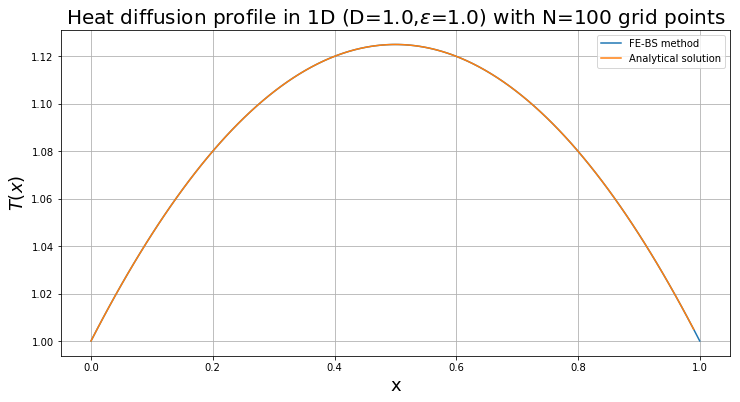

In [7]:
# Compute solution with FE-BS method
T = febs(D, U, L, b)

fig1 = plt.subplots(figsize=[12,6])
plt.plot(np.arange(0,N)*L0/(N-1), T, label='FE-BS method')
plt.plot(np.arange(0,L0,0.01), Texact, label='Analytical solution')
plt.xlabel('x', fontsize = 18)
plt.ylabel(r'$T(x)$', fontsize = 18)
plt.grid()
plt.legend()
plt.title(f'Heat diffusion profile in 1D (D={Dc},$\epsilon$={eps}) with N={N} grid points', fontsize=20)
plt.show(fig1)

It can be noticed that this is an exact method: in fact the analytical solution and the one obtained by using the FE-BS method are superimposed.

### 7) Verify that the result is correct by multiplying the solution with the matrix and computing the residual, and show that the residual is almost zero

Residual: $ \vec r = \vec b - A \vec x$

Standard deviation of residual:  1.5392358858618306e-16


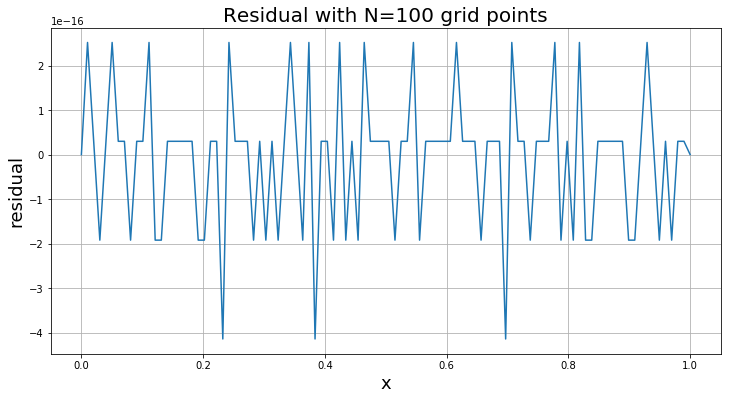

In [8]:
res = b - tridiag_mul(D, U, L, T)
print('Standard deviation of residual: ', np.std(res))

fig1 = plt.subplots(figsize=[12,6])
plt.plot(np.arange(0,N)*L0/(N-1), res)
plt.xlabel('x', fontsize = 18)
plt.ylabel('residual', fontsize = 18)
plt.grid()
plt.title(f'Residual with N={N} grid points', fontsize=20)
plt.show()

### 8) Why is it not exactly zero?

The residual are almost zero (order of magnitude $10^{-16}$). They are not exactly zero because of the finite precision of the double representation.

### 9) Change N to a larger number, e.g. 1000, and see that the result is the same, but smoother

In [9]:
N = 1000
h = L0 / N

D, U, L, b = createArray(N)

Standard deviation of residual:  1.6255969569412266e-16


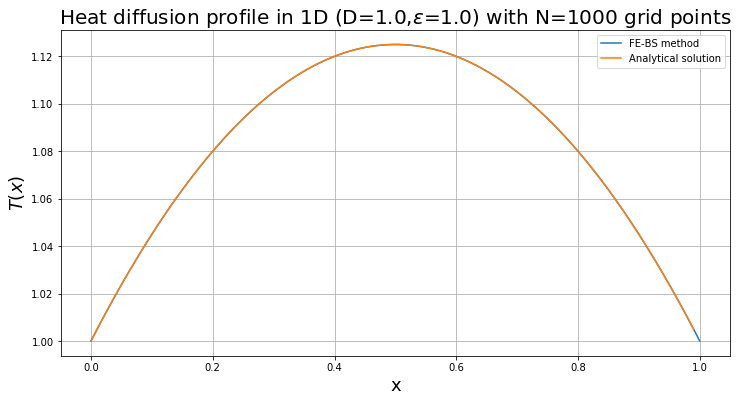

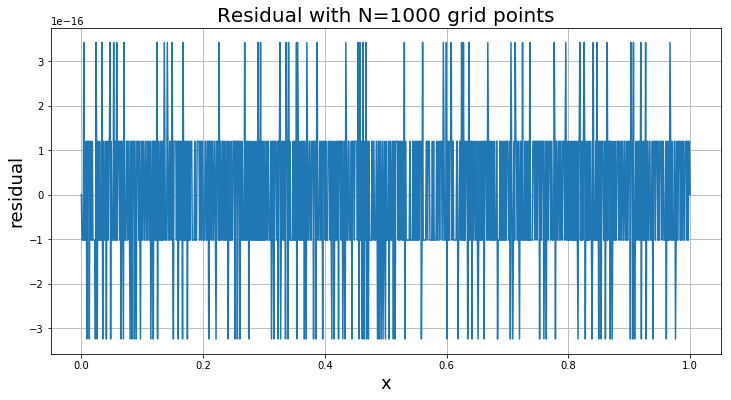

In [10]:
# compute temperature profile
T = febs(D, U, L, b)

fig1 = plt.subplots(figsize=[12,6])
plt.plot(np.arange(0,N)*L0/(N-1), T, label='FE-BS method')
plt.plot(np.arange(0,L0,0.01), Texact, label='Analytical solution')
plt.xlabel('x', fontsize = 18)
plt.ylabel(r'$T(x)$', fontsize = 18)
plt.grid()
plt.legend()
plt.title(f'Heat diffusion profile in 1D (D={Dc},$\epsilon$={eps}) with N={N} grid points', fontsize=20)

# compute residual
res = b - tridiag_mul(D, U, L, T)
print('Standard deviation of residual: ', np.std(res))

fig1 = plt.subplots(figsize=[12,6])
plt.plot(np.arange(0,N)*L0/(N-1), res)
plt.xlabel('x', fontsize = 18)
plt.ylabel('residual', fontsize = 18)
plt.grid()
plt.title(f'Residual with N={N} grid points', fontsize=20)
plt.show()

### 10) Design a function/subroutine to perform a single Jacobi iteration step for this problem. Take initially N = 8. Perform 30 iteration steps

In [11]:
N = 8
steps = 30
h = L0 / N

D, U, L, b = createArray(N)

In [12]:
def jacobi(D, U, L, b, steps, x0=[]):
    N = D.shape[0]
    x = np.zeros((steps+1, N))
    
     # define initial guess
    if len(x0) == 0:
        x0 = np.zeros(N)
    x[0] = x0
    
    # loop over iteration steps
    for i in range(1,steps+1):
        x[i] = b / D -  ( np.roll(U*x[i-1],-1) + np.roll(L*x[i-1],1) ) / D

    return x

### 11) Plot the result of each iteration over each other, and overplot the true solution that we found with the forward elimination, backward substitution

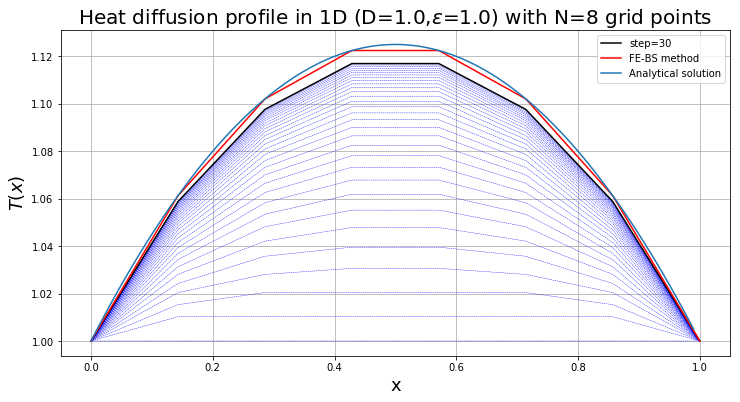

In [13]:
# initial guess -> uniform profile
x0 = np.zeros(N) + T0

# compute temperature profile
T = jacobi(D, U, L, b, steps, x0=x0)
Tfebs = febs(D, U, L, b)

# Plot solutions
fig1 = plt.subplots(figsize=[12,6])
for i in range(T.shape[0]-1):
    plt.plot(np.arange(N)*L0/(N-1), T[i], '--b', linewidth = 0.4)
plt.plot(np.arange(N)*L0/(N-1),T[-1],'k', label=f'step={steps}')
plt.plot(np.arange(N)*L0/(N-1),Tfebs,'r', label='FE-BS method')
plt.plot(np.arange(0,L0,0.01), Texact, label='Analytical solution')
plt.xlabel('x', fontsize = 18)
plt.ylabel(r'$T(x)$', fontsize = 18)
plt.grid()
plt.legend()
plt.title(f'Heat diffusion profile in 1D (D={Dc},$\epsilon$={eps}) with N={N} grid points', fontsize=20)
plt.show(fig1)

### 12) Now do the same, but for N = 100.

In [14]:
N = 100
steps = 30
h = L0 / N

D, U, L, b = createArray(N)

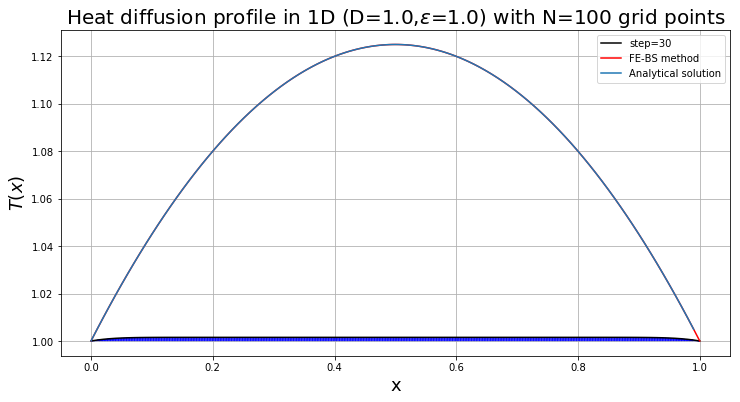

In [15]:
# initial guess -> uniform profile
x0 = np.zeros(N) + T0

# compute temperature profile
T = jacobi(D, U, L, b, steps, x0=x0)
Tfebs = febs(D, U, L, b)

# PLOT JACOBI SOLUTION
fig1 = plt.subplots(figsize=[12,6])
for i in range(T.shape[0]-1):
    plt.plot(np.arange(N)*L0/(N-1), T[i], '--b', linewidth = 0.3)
plt.plot(np.arange(N)*L0/(N-1), T[-1],'k', label=f'step={steps}')
plt.plot(np.arange(N)*L0/(N-1), Tfebs,'r', label='FE-BS method')
plt.plot(np.arange(0,L0,0.01), Texact, label='Analytical solution')
plt.xlabel('x', fontsize = 18)
plt.ylabel(r'$T(x)$', fontsize = 18)
plt.grid()
plt.legend()
plt.title(f'Heat diffusion profile in 1D (D={Dc},$\epsilon$={eps}) with N={N} grid points', fontsize=20)
plt.show(fig1)

### Explain the behavior and the difference to the case for N = 8

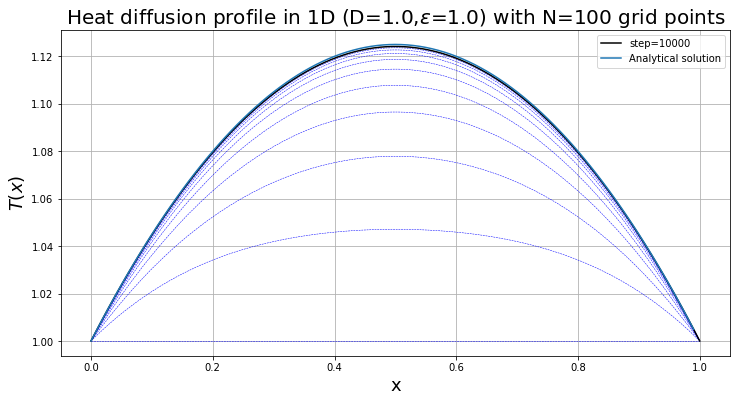

In [16]:
steps = 10000

# initial guess -> uniform profile
x0 = np.zeros(N) + T0

# compute temperature profile
T = jacobi(D, U, L, b, steps, x0=x0)
Tfebs = febs(D, U, L, b)

# PLOT JACOBI SOLUTION
fig1 = plt.subplots(figsize=[12,6])
for i in range(0,T.shape[0]-1,1000):
    plt.plot(np.arange(N)*L0/(N-1), T[i], '--b', linewidth = 0.5)
plt.plot(np.arange(N)*L0/(N-1), T[-1],'k', label=f'step={steps}')
#plt.plot(np.arange(N)*L0/(N-1), Tfebs,'r', label='FE-BS method')
plt.plot(np.arange(0,L0,0.01), Texact, label='Analytical solution')
plt.xlabel('x', fontsize = 18)
plt.ylabel(r'$T(x)$', fontsize = 18)
plt.grid()
plt.legend()
plt.title(f'Heat diffusion profile in 1D (D={Dc},$\epsilon$={eps}) with N={N} grid points', fontsize=20)
plt.show(fig1)

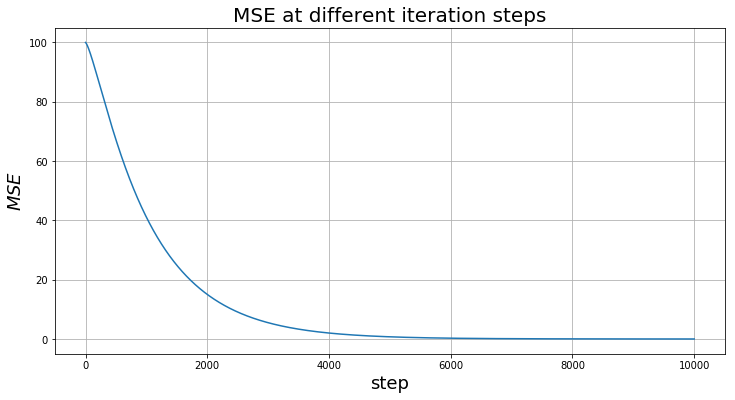

In [17]:
# PLOT MEAN-SQUARED-ERROR AT INCREASING ITERATION STEPS
# (compare to first guess)
MSE = np.std(T - Tfebs, axis=1)**2 / np.std(T[0] - Tfebs)**2 * 100

fig1 = plt.subplots(figsize=[12,6])
plt.plot(np.arange(len(MSE)),MSE)
plt.xlabel('step', fontsize = 18)
plt.ylabel(r'$MSE$', fontsize = 18)
plt.grid()
plt.title(f'MSE at different iteration steps', fontsize=20)
plt.show(fig1)

It can be noticed that with N=100 grid points the algorithm converges slower with respect to the one with N=8 grid points. This is because the increment is proportional to $h^2$, which is inversily proportional to the squared number of grid points. Indeed with 10000 iterations the mean squared error of the solution approaches zero and the solution approaches the analytical one.

# Exercise 1.2 - Solution with the multigrid method

### 1) Construct the 2D matrices R(3), R(2), R(1) for restriction to the next lower level (coarser grid)

In [18]:
# RESTRICTION MATRIX
def R(N):
    # compute dimensions of range
    newN = int( (N-1) / 2. + 1 )    
    
    # define empty matrix
    R = np.zeros((newN, N))
    
    # set first and last rows
    R[0, :2] = [2., 1.]
    R[-1, -2:] = [1., 2.]
    
    temp = np.array(([1,2,1]))
    
    for i in range(1,newN-1):
        R[i, 2*i-1:2*i+2] = temp

    return R / 4.

In [19]:
# Plot restriction matrices
N = 9

R3 = R(N)
print('R(N=%i -> N=%i):\n' %(R3.shape[1], R3.shape[0]),R3,'\n')
R2 = R(R3.shape[0])
print('R(N=%i -> N=%i):\n' %(R2.shape[1], R2.shape[0]),R2,'\n')
R1 = R(R2.shape[0])
print('R(N=%i -> N=%i):\n' %(R1.shape[1], R1.shape[0]),R1,'\n')

R(N=9 -> N=5):
 [[0.5  0.25 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.25 0.5  0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.5  0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.25 0.5  0.25 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.25 0.5 ]] 

R(N=5 -> N=3):
 [[0.5  0.25 0.   0.   0.  ]
 [0.   0.25 0.5  0.25 0.  ]
 [0.   0.   0.   0.25 0.5 ]] 

R(N=3 -> N=2):
 [[0.5  0.25 0.  ]
 [0.   0.25 0.5 ]] 



### 2) Construct the 2D matrices P(2), P(1), P(0) for prolongation to the next higher level (finer grid)

In [20]:
# PROLONGATION MATRIX
def P(N):
    # compute dimensions of range
    newN = int( (N-1) * 2. + 1 )
    
    # define empty matrix
    P = np.zeros(( newN, N ))
    
    # set first and last columns
    P[0:2,0] = np.array(([2,1])).T
    P[-2:,-1] = np.array(([1,2])).T
    
    temp = np.array(([1,2,1])).T
    
    for i in range(1,N-1):
        #print(P[2*i:2*i+3, i].shape)
        P[2*i-1:2*i+2, i] = temp
    
    return P / 2.

In [21]:
# Plot prolongation matrices
N = 2

P0 = P(N)
print('P(N=%i -> N=%i):\n' %(P0.shape[1], P0.shape[0]),P0,'\n')
P1 = P(P0.shape[0])
print('P(N=%i -> N=%i):\n' %(P1.shape[1], P1.shape[0]),P1,'\n')
P2 = P(P1.shape[0])
print('P(N=%i -> N=%i):\n' %(P2.shape[1], P2.shape[0]),P2,'\n')

P(N=2 -> N=3):
 [[1.  0. ]
 [0.5 0.5]
 [0.  1. ]] 

P(N=3 -> N=5):
 [[1.  0.  0. ]
 [0.5 0.5 0. ]
 [0.  1.  0. ]
 [0.  0.5 0.5]
 [0.  0.  1. ]] 

P(N=5 -> N=9):
 [[1.  0.  0.  0.  0. ]
 [0.5 0.5 0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  1. ]] 



### Check that the P and R matrices are (apart from a factor) each other’s tranpose

In [22]:
print('P(N=%i -> N=%i):\n' %(P0.shape[1], P0.shape[0]), P0)
print('R(N=%i -> N=%i):\n' %(R1.shape[1], R1.shape[0]), R1.T,'\n')
print('P(N=%i -> N=%i):\n' %(P1.shape[1], P1.shape[0]), P1)
print('R(N=%i -> N=%i):\n' %(R2.shape[1], R2.shape[0]), R2.T,'\n')
print('P(N=%i -> N=%i):\n' %(P2.shape[1], P2.shape[0]), P2)
print('R(N=%i -> N=%i):\n' %(R3.shape[1], R3.shape[0]), R3.T,'\n')

P(N=2 -> N=3):
 [[1.  0. ]
 [0.5 0.5]
 [0.  1. ]]
R(N=3 -> N=2):
 [[0.5  0.  ]
 [0.25 0.25]
 [0.   0.5 ]] 

P(N=3 -> N=5):
 [[1.  0.  0. ]
 [0.5 0.5 0. ]
 [0.  1.  0. ]
 [0.  0.5 0.5]
 [0.  0.  1. ]]
R(N=5 -> N=3):
 [[0.5  0.   0.  ]
 [0.25 0.25 0.  ]
 [0.   0.5  0.  ]
 [0.   0.25 0.25]
 [0.   0.   0.5 ]] 

P(N=5 -> N=9):
 [[1.  0.  0.  0.  0. ]
 [0.5 0.5 0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  1. ]]
R(N=9 -> N=5):
 [[0.5  0.   0.   0.   0.  ]
 [0.25 0.25 0.   0.   0.  ]
 [0.   0.5  0.   0.   0.  ]
 [0.   0.25 0.25 0.   0.  ]
 [0.   0.   0.5  0.   0.  ]
 [0.   0.   0.25 0.25 0.  ]
 [0.   0.   0.   0.5  0.  ]
 [0.   0.   0.   0.25 0.25]
 [0.   0.   0.   0.   0.5 ]] 



### 3) Take the 9 × 9 matrix of the previous section (or the one from the 1D diffusion problem in the lecture notes), again in full 9 × 9 shape, and use the R(i) and P(i) matrices to create the restricted versions of that matrix

In [23]:
# Define complete diffusion matrix
N = 9
A = np.zeros(( N,N ))

for i in range(1,N-1):
    A[i,i] = -2
    A[i,i-1] = 1
    A[i,i+1] = 1
    
A[0,0] = 1
A[N-1,N-1] = 1

In [24]:
# Galerkin coarse grid approximation
def A_h_2h(A):
    N = A.shape[0]
    Rh = R(N)
    Ph = P(Rh.shape[0])
    
    return Rh @ A @ Ph

In [25]:
A_9_5 = A_h_2h(A)
A_5_3 = A_h_2h(A_9_5)
A_3_2 = A_h_2h(A_5_3)

print('A_h:\n', A, '\n')
print('A_2h:\n', A_9_5, '\n')
print('A_4h:\n', A_5_3, '\n')
print('A_8h:\n', A_3_2, '\n')

A_h:
 [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]] 

A_2h:
 [[ 0.5   0.    0.    0.    0.  ]
 [ 0.25 -0.5   0.25  0.    0.  ]
 [ 0.    0.25 -0.5   0.25  0.  ]
 [ 0.    0.    0.25 -0.5   0.25]
 [ 0.    0.    0.    0.    0.5 ]] 

A_4h:
 [[ 0.25    0.      0.    ]
 [ 0.0625 -0.125   0.0625]
 [ 0.      0.      0.25  ]] 

A_8h:
 [[0.125 0.   ]
 [0.    0.125]] 



### 4) Construct a recursive subroutine/function that applies the V-shaped multigrid procedure using Jacobi iteration

In [26]:
# Re-define jacobi method for a complete diffusion matrix A
def jacobi(A, b, steps=1, x0=[]):
    N = A.shape[0]
    x = np.zeros((steps+1, N))
    
    D = np.diagonal(A)
    U = np.triu(A, k=1)
    L = np.tril(A, k=-1)
    
    # define initial guess
    if len(x0) == 0:
        x0 = np.zeros(N)
    x[0] = x0
    
    # loop over iteration steps
    for i in range(1,steps+1):
        x[i] = b / D -  (U + L) @ x[i-1] / D
    return x

# create offset array b
def createB(N, L0 = 1.):
    h = L0 / N
    
    b = np.zeros(N) - h**2 * eps/Dc
    b[0] = T0
    b[-1] = T0
    
    return b

In [27]:
# V-CYCLE
def Vcycle(A, b, x0, steps=1, verbose = False):
    if verbose:
        print('V-Cycle:\n')
    
    N = A.shape[0]
    
    # number of steps
    l = int( np.log2(N-1) )
    
    # save solutions at each step
    e, r, As = [], [], []
    
    # compute first relaxation step
    x = jacobi(A,b, steps=steps, x0=x0)[-1]
    
    e.append(x), r.append(b), As.append(A)
    
    # compute residual
    rl = b - A @ x
    
    # RESTRICTION STEPS
    for i in range(l):
        # restrict residual to coarser mesh
        r_2h = R(len(rl)) @ rl
        r.append(r_2h)
        if verbose:
            print('Restriction from N=%i to N=%i' % (len(rl), len(r_2h) ) )
        
        # restrict matrix to coarser mesh
        A = A_h_2h(A)
        As.append(A)
        
        # relaxation
        e_2h = jacobi(A,r_2h, steps=steps)[-1]
        e.append(e_2h)
        
        # new residual
        rl = r_2h - A @ e_2h
    
    # PROLONGATION STEPS
    for i in range(l-1):
        # prolong solution to finer mesh
        e_h = P(len(e_2h)) @ e_2h
        
        if verbose:
            print('Prolongation from N=%i to N=%i' % (len(e_2h), len(e_h) ) )
        
        # correct current solution
        e_2h = e[l-i-1] + e_h
        
        # relaxation
        e_2h = jacobi(As[l-i-1],r[l-i-1], steps=steps, x0 = e_2h)[-1]
    
    # LAST STEP
    # prolong solution to finer mesh
    e_h = P(len(e_2h)) @ e_2h
    
    if verbose:
        print('Prolongation from N=%i to N=%i' % (len(e_2h), len(e_h) ) )
    
    # correct solution
    x = x + e_h
    
    # compute last relaxation step
    x = jacobi(As[0], b, steps=steps, x0 = x)[-1]
    
    return x

In [28]:
# define initial guess
x0 = np.zeros(N) + T0

b = createB(N)

# Compute V-Cycle
T = Vcycle(A, b, x0=x0, verbose = True)

V-Cycle:

Restriction from N=9 to N=5
Restriction from N=5 to N=3
Restriction from N=3 to N=2
Prolongation from N=2 to N=3
Prolongation from N=3 to N=5
Prolongation from N=5 to N=9


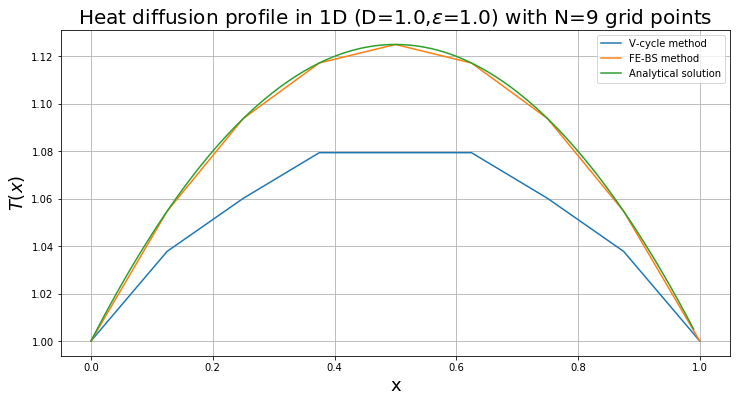

In [29]:
# compute temperature profile
D, U, L, b = createArray(N)
Tfebs = febs(D, U, L, b)

fig1 = plt.subplots(figsize=[12,6])
plt.plot(np.arange(0,N)*L0/(N-1), T, label='V-cycle method')
plt.plot(np.arange(0,N)*L0/(N-1), Tfebs, label='FE-BS method')
plt.plot(np.arange(0,L0,0.01), Texact, label='Analytical solution')
plt.xlabel('x', fontsize = 18)
plt.ylabel(r'$T(x)$', fontsize = 18)
plt.grid()
plt.legend()
plt.title(f'Heat diffusion profile in 1D (D={Dc},$\epsilon$={eps}) with N={N} grid points', fontsize=20)
plt.show()

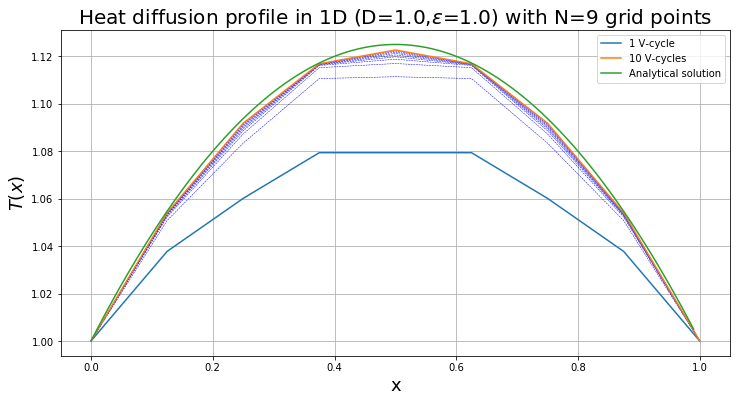

In [30]:
# Compute Multi V-Cycle
cycles = 10

fig1 = plt.subplots(figsize=[12,6])

plt.plot(np.arange(0,N)*L0/(N-1), T, label='1 V-cycle')

for i in range(1,cycles-1):
    T = Vcycle(A, b, x0=T)
    #if (i % 5 == 0):
    plt.plot(np.arange(0,N)*L0/(N-1), T, '--b', linewidth = 0.5)
    
T = Vcycle(A, b, x0=T)
plt.plot(np.arange(0,N)*L0/(N-1), T , label='%i V-cycles' %(cycles))
#plt.plot(np.arange(0,N)*L0/(N-1), Tfebs, label='FE-BS method')
plt.plot(np.arange(0,L0,0.01), Texact, label='Analytical solution')
plt.xlabel('x', fontsize = 18)
plt.ylabel(r'$T(x)$', fontsize = 18)
plt.grid()
plt.legend()
plt.title(f'Heat diffusion profile in 1D (D={Dc},$\epsilon$={eps}) with N={N} grid points', fontsize=20)
plt.show()

It can be noticed that with only one V-Cycle the solution is barely similar to the analytical one, but already with two concatenated V-cycles the solution is much improved and is approaching the analytical one as the number of V-cycles increases: so this method is efficient when more V-cycles are concatenated after each other.

# Exercise 1.3 - 3D Poisson equation solver

3D Poisson equation:
$$ \nabla^2 \tilde{\Phi} = 4 \pi G \rho $$
by calling $ \Phi = \dfrac{\tilde{\Phi}}{4 \pi G} $, the equation becomes:
$$ \nabla^2 \Phi = \rho $$

In [31]:
# Define density matrix
N = 10

rho = np.zeros(( N, N, N ))

# Make a density block at the center with density 1
rho[ int(N/2)-1:int(N/2)+1, int(N/2)-1:int(N/2)+1, int(N/2)-1:int(N/2)+1 ] = np.ones(( 2,2,2 ))

3D discretized laplacian operator:
$$ A_{3D} = I \otimes I \otimes A_{1D} + I \otimes A_{1D} \otimes I + A_{1D} \otimes I \otimes I $$

In [32]:
# Laplace operator discretized in 1d
A = np.zeros((N,N))

for i in range(1,N-1):
    A[i,i] = -2
    A[i,i-1] = 1
    A[i,i+1] = 1
    
A[0,0] = 1
A[N-1,N-1] = 1

In [33]:
# Laplace operator discretized in 3d
unos = np.identity(N)

lapl = np.kron(unos, np.kron(unos, A))
lapl += np.kron(unos, np.kron(A, unos))
lapl += np.kron(A, np.kron(unos, unos))

print(lapl.shape)

(1000, 1000)


In [34]:
# Map density matrix in a 1d array
rho = rho.ravel(order='F')
print(rho.shape)

(1000,)


In [35]:
# Solve using the biconjugate gradient method
from scipy.sparse.linalg import bicgstab

phi, info = bicgstab(lapl, rho)
print(phi.shape)
phi = phi.reshape(N,N,N)
print(phi.shape)

(1000,)
(10, 10, 10)


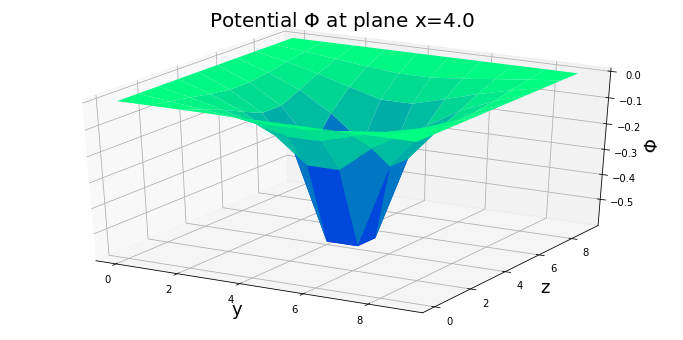

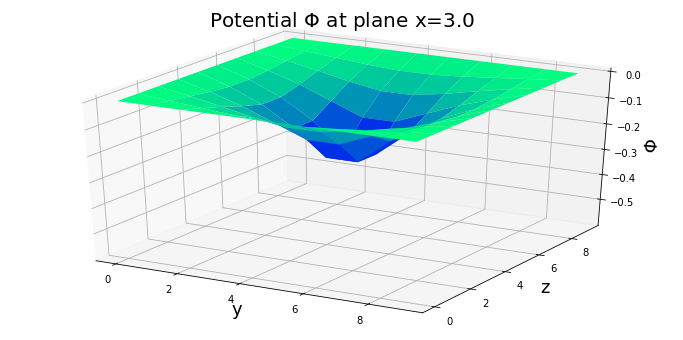

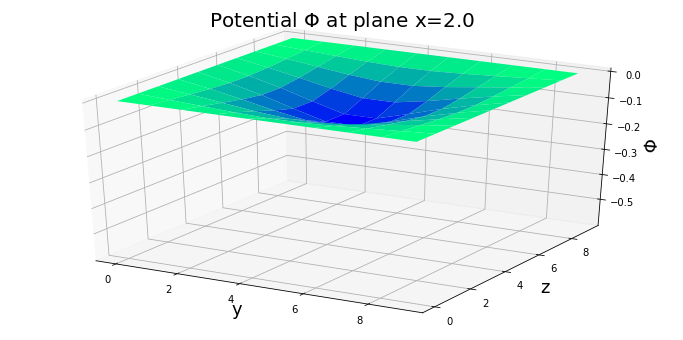

In [36]:
# Plot the potential at different planes
from mpl_toolkits.mplot3d import axes3d

X = np.arange(N)
Y = np.arange(N)
X, Y = np.meshgrid(X, Y)

pos = [int(N/2)-1, int(N/2)-2, int(N/2)-3]

for i in pos:
    fig = plt.subplots(figsize=[12,6])
    
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, phi[ i, X, Y],
                    cmap='winter')
    ax.set_zlim3d(phi.min(), phi.max())
    ax.set_xlabel('y', fontsize = 18)
    ax.set_ylabel('z', fontsize = 18)
    ax.set_zlabel(r'$\Phi$', fontsize = 18)
    ax.set_title(f'Potential $\Phi$ at plane x=%.1f' %(i) , fontsize = 20);